## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)
combined_df.rename(columns={'Tumor Volume (mm3)': 'Tumor_Volume'}, inplace=True)
combined_df.set_index('Mouse ID').head(10)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
k403,Ramicane,Male,21,16,25,33.464577,1
k403,Ramicane,Male,21,16,30,31.099498,1
k403,Ramicane,Male,21,16,35,26.546993,1
k403,Ramicane,Male,21,16,40,24.365505,1


## Summary statistics

In [2]:
# Question 1 - Generate a summary statistics table of mean, median, variance, standard deviation, 
#              and SEM of the tumor volume for each regimen

regimen_df = combined_df.groupby('Drug Regimen')

tumor_df= regimen_df.Tumor_Volume.agg(average_value=('mean'),
                                    median_value=('median'),
                                    variance_value=('var'),
                                    standard_deviation=('std'),
                                    standard_error=('sem'), count_size=('count')
                                    ).rename(columns={'average_value':'Mean',
                                                      'median_value':'Median',
                                                      'variance_value':'Variance',
                                                        'standard_deviation': 'Std Deviation',
                                                         'standard_error':'SEM',
                                                        'count_size':'Number of Tumors'
                                                        })


tumor_df

,Mean,Median,Variance,Std Deviation,SEM,Number of Tumors
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,161
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar plots

Text(0, 0.5, 'Number of Tumors')

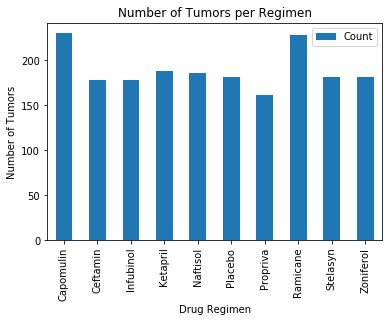

In [3]:
# Question 2 - Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_df= combined_df.groupby('Drug Regimen')['Tumor_Volume'].size().to_frame('Count').reset_index()

ax = drug_df.plot.bar(x='Drug Regimen', y='Count', rot=0, title='Number of Tumors per Regimen')
ax.set_xticklabels(drug_df['Drug Regimen'], rotation=90)
ax.set_ylabel('Number of Tumors')

Text(0, 0.5, 'Number of Tumors')

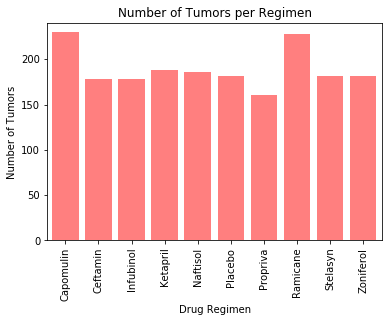

In [4]:
# Question 3 - Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(regimen_df))
tick_locations = [value for value in x_axis]
drug_list = tumor_df['Number of Tumors'].keys()


#Set X dataset and visual attributions 
plt.bar(x_axis, tumor_df['Number of Tumors'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_list, rotation='vertical')


# Set x and y limits
plt.xlim(-0.55, len(x_axis)-0.43)
plt.ylim(0, max(tumor_df["Number of Tumors"])+10)

# Set a Title and labels
plt.title("Number of Tumors per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tumors")

## Pie plots

Text(0, 0.5, '')

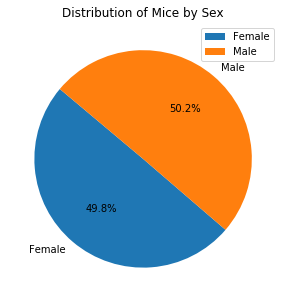

In [5]:
# Question 4 - Generate a pie plot showing the distribution of female versus male mice using pandas

#Get rid of duplicates
no_dupli_mouse = combined_df.drop_duplicates(['Mouse ID'])

#gender_counts
gender_count = no_dupli_mouse.groupby(['Sex']).size().to_frame('Count')

ax = gender_count.plot.pie(y='Count', figsize=(5,5), title='Distribution of Mice by Sex', autopct="%1.1f%%", startangle=140)
ax.set_ylabel('')

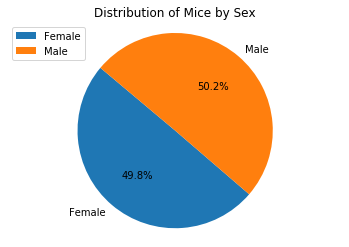

<Figure size 432x288 with 0 Axes>

In [6]:
# Question 5 - Generate a pie plot showing the distribution of female versus male mice using pyplot

#Get rid of duplicates
no_dupli_mouse = combined_df.drop_duplicates(['Mouse ID'])

#gender_counts
gender_count = no_dupli_mouse.groupby(['Sex']).size().to_frame('Count')

gender_list = gender_count.keys()

# Create a pie chart based upon the trip duration of that single bike
gender_pie = gender_count.plot(kind="pie", y=gender_list, startangle=140, autopct="%1.1f%%", title=('Distribution of Mice by Sex'))
gender_pie.set_ylabel("")

plt.axis("equal")
plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

In [7]:
# Question 6 - Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Most promissing treatment regimens - Defined by variance (how far the tumor volume data 
# points are from the tumor volume mean). The smaller the better. It means that the final tumor
# size is closer to the inicial tumor size.

final_tumor_volume = combined_df[combined_df['Timepoint']== 45]
mouse_df = final_tumor_volume.groupby(['Drug Regimen'])
tumor_vol = mouse_df['Tumor_Volume'].mean().to_frame('Tumor Volume Mean')

tumor_vol.sort_values(by='Tumor Volume Mean', ascending=True)


,Tumor Volume Mean
Drug Regimen,
Ramicane,34.955595
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Zoniferol,65.960888
Propriva,66.258529
Placebo,68.084082
Stelasyn,68.438310
Naftisol,69.265506


In [8]:
# Question 6' - Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

final_tumor_volume.sort_values(by='Tumor_Volume', ascending=True).head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
114,n364,Ramicane,Male,4,17,45,31.095335,1


In [9]:
# Question 7 - Calculate the IQR and quantitatively determine if there are any potential outliers.



# First quartile (Q1) 
q1 = np.percentile(combined_df['Tumor_Volume'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
q3 = np.percentile(combined_df['Tumor_Volume'], 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
iqr = q3 - q1

# Determine any potential outliers
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
outliers = 0

for volume in combined_df['Tumor_Volume']: 
    if volume > upper_bound or volume < lower_bound:
        outliers += 1

print('The first quartile is {:1.1f}, the third quartile is {:1.1f}, and the interquartile range is {:1.1f}.''\n''There are {} outliers'.format(q1, q3, iqr,outliers))



The first quartile is 45.0, the third quartile is 56.3, and the interquartile range is 11.3.
There are 19 outliers


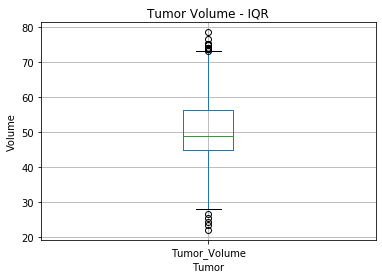

In [10]:
# Question 7'- Calculate the IQR - Boxplot

combined_df.boxplot(column = 'Tumor_Volume');
plt.title('Tumor Volume - IQR')
plt.xlabel("Tumor")
plt.ylabel("Volume")
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

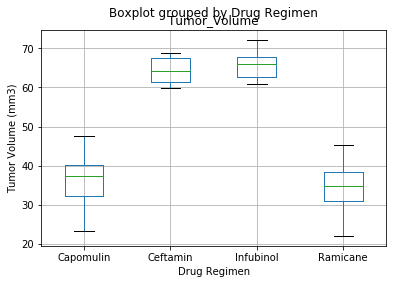

In [11]:
# Question 8 - Generate a box plot of the final tumor volume of each mouse across four regimens of interest


total_drug_df= combined_df[combined_df['Drug Regimen'].isin(['Ramicane','Capomulin','Ceftamin', 'Infubinol'])]

final_volume = total_drug_df[total_drug_df['Timepoint']== 45]

final_volume.boxplot(by="Drug Regimen", column="Tumor_Volume")
plt.ylabel("Tumor Volume (mm3)")


## Line and scatter plots

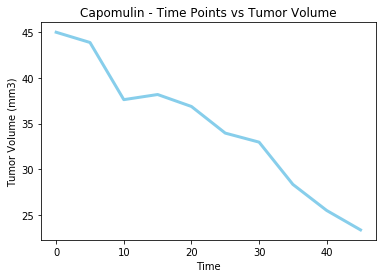

In [12]:
# Question 9 - Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_mouse_df = combined_df[combined_df['Mouse ID']== 's185']


time_volume_df=pd.DataFrame({'time': capomulin_mouse_df['Timepoint'], 'volume': capomulin_mouse_df['Tumor_Volume']})
plt.plot( 'time', 'volume', data=time_volume_df, color='skyblue', linewidth=3)
plt.title('Capomulin - Time Points vs Tumor Volume')
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

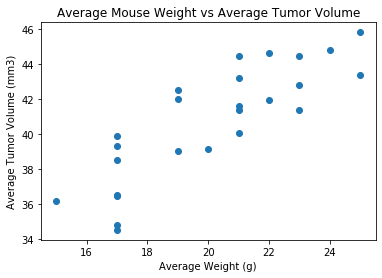

In [13]:
# Question 10 - Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse_df = combined_df[combined_df['Drug Regimen']== 'Capomulin']
average_tumor_df=capomulin_mouse_df.groupby(['Mouse ID']).mean()

plt.scatter(average_tumor_df['Weight (g)'],average_tumor_df['Tumor_Volume'])
plt.title('Average Mouse Weight vs Average Tumor Volume')
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [14]:
# Question 11 - Calculate the correlation coefficient for 
#               mouse weight and average tumor volume for the Capomulin regimen

capomulin_mouse_df = combined_df[combined_df['Drug Regimen']== 'Capomulin']
average_tumor_df=capomulin_mouse_df.groupby(['Mouse ID']).mean()

corr, _ = st.spearmanr(average_tumor_df['Weight (g)'],average_tumor_df['Tumor_Volume'])
print('The correlation coefficient (Spearmans correlation) is %.3f:''\n''It indicates a notable correlation between weight and tumor volume' % corr)



The correlation coefficient (Spearmans correlation) is 0.848:
It indicates a notable correlation between weight and tumor volume


Coefficient of determination (squared R): 0.71 (satisfactory value)
Intercept (coefficient, b0): the model predicts the response 21.55 when x is zero
Slope (coefficient, b1): the model predicts the response rises by 0.95 when x is increased by one


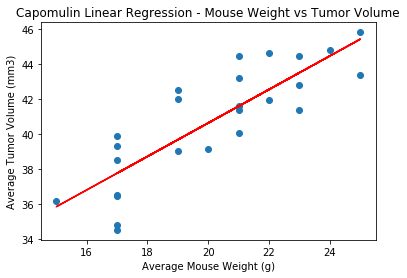

In [15]:
# Question 11' - Linear regression model for 
#               mouse weight and average tumor volume for the Capomulin regimen

#Defining data
x= np.array(average_tumor_df['Weight (g)']).reshape((-1,1))
y=np.array(average_tumor_df['Tumor_Volume'])

#create a model and fit it
model= LinearRegression().fit(x,y)

#make predictions
y_pred = model.predict(x)

#get results
r_sq = model.score(x, y)
print('Coefficient of determination (squared R): %.2f (satisfactory value)' % r_sq)
print('Intercept (coefficient, b0): the model predicts the response %.2f when x is zero' % model.intercept_)
print('Slope (coefficient, b1): the model predicts the response rises by %.2f when x is increased by one' % model.coef_)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Capomulin Linear Regression - Mouse Weight vs Tumor Volume')
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()